## 모델 불러오기

In [1]:
## 라이브러리 설치
##pip install trimesh

In [2]:
import trimesh

In [3]:
model = trimesh.load('./obj/model.stl')

In [4]:
model.show()

In [5]:
## 모델 내 중복된 꼭지점 합치기
## trimesh에서는 필요없음
# model.merge_vertices()

In [6]:
## 변수에 저장
vertices = model.vertices

## 샘플 추출

https://trimesh.org/trimesh.sample.html

## 시각화

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

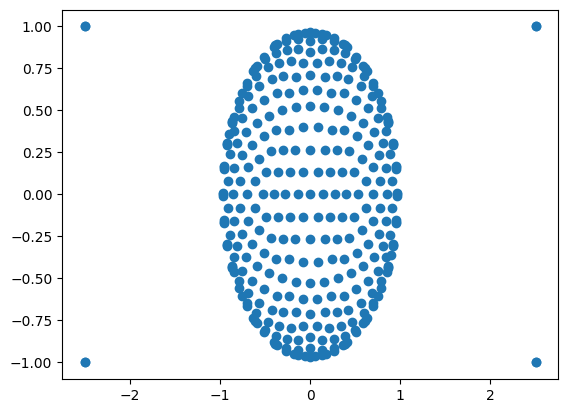

In [8]:
plt.scatter(vertices[:,0], vertices[:,1])

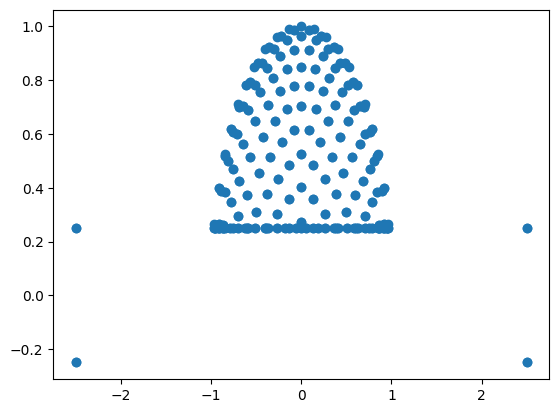

In [9]:
plt.scatter(vertices[:,0], vertices[:,2])

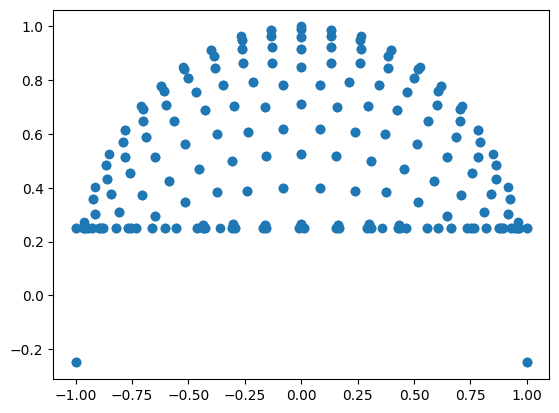

In [10]:
plt.scatter(vertices[:,1], vertices[:,2])

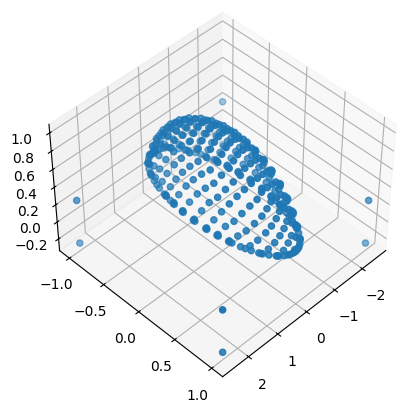

In [11]:
## 꼭지점 scatter
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=45, azim=45)
ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2])

In [47]:
##sample_surface_even()은 샘플들이 서로 가까이 붙지않도록 배치
samples = trimesh.sample.sample_surface_even(model, 100)
points = samples[0]
points

TrackedArray([[-0.17076277, -0.05305695, -0.25      ],
              [ 0.95903254,  0.14827224, -0.25      ],
              [ 2.01020583,  0.21738204,  0.25      ],
              [-0.26171489, -0.57725129,  0.77065098],
              [-1.36247998, -0.21744569,  0.25      ],
              [ 1.48819487, -1.        ,  0.2203947 ],
              [ 2.5       ,  0.12500306, -0.14618151],
              [ 2.32104373, -0.61436131,  0.25      ],
              [ 0.29930666, -0.02340335, -0.25      ],
              [ 1.67365065,  1.        , -0.24488885],
              [-0.298995  ,  0.84157992,  0.44354305],
              [ 1.88652291, -1.        ,  0.24489522],
              [-0.21286916,  1.        ,  0.15399855],
              [-0.77764537, -0.70351416, -0.25      ],
              [ 0.6336978 ,  0.39539611,  0.66005121],
              [ 1.81842113, -0.22915372,  0.25      ],
              [ 0.35729588,  0.51898027,  0.77156675],
              [-1.12604093, -0.38712936, -0.25      ],
          

In [13]:
## 거리상관 없이 임의의 점을 샘플링 할 때,

# import random
# import pandas as pd
# 
# sample_rand = trimesh.sample.sample_surface_even(model, 1000)
# points_rand = list(sample_rand[0])
# points_res = random.sample(points_rand, 100)
# 
# df_test = pd.DataFrame(points_res)
# df_test.to_csv('../3D/data/test.csv', index=False)

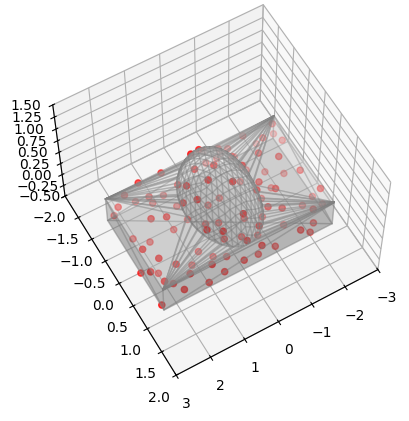

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

## 점들 표시
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='red')
## mesh 표현
ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=model.faces, color='white', alpha= 0.3, edgecolor='gray')

## 보이는 각도 조정
ax.view_init(elev=60, azim=60)

## 축 크기 조정
plt.axis([-3, 3, -2, 2, -0.5,1.5])
plt.show()

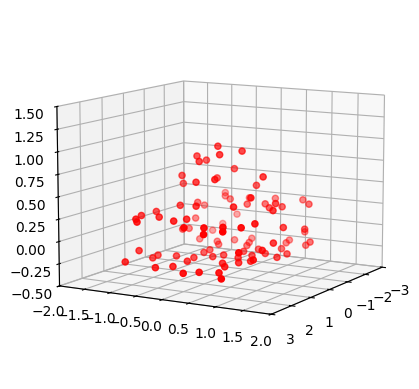

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=model.faces, color='white', alpha=0.5, edgecolor='gray', zorder=1)
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='red', zorder=1)

ax.view_init(elev=10, azim=30)

plt.axis([-3, 3, -2, 2, -0.5,1.5])
plt.show()

## 확률 밀도 함수 추정
### scipy 내 parzen method는 1차원 윈도우만 생성
https://sebastianraschka.com/Articles/2014_kernel_density_est.html

## 데이터 CSV로 저장

In [16]:
import pandas as pd

In [17]:
df = pd.DataFrame(points)

In [18]:
df

,0,1,2
0,0.150699,0.327609,-0.250000
1,1.406108,-0.174842,0.250000
2,1.508025,-0.665461,0.250000
3,0.744582,-0.255810,0.613699
4,-1.971680,-0.250122,0.250000
...,...,...,...
95,1.086425,0.995485,0.250000
96,2.190458,-0.461245,-0.250000
97,0.687890,-0.323872,-0.250000
98,1.235528,-0.909381,-0.250000


In [19]:
df.to_csv("../3D/data/points.csv", index=False)

## 데이터 호출

In [20]:
## 불러온 값은 함수값이 아님!! 밀도값임!
## 밀도값 -> 함수값으로 변환 필요
dens = pd.read_csv("../3D/data/density.csv")
# dens
# type(dens)

In [21]:
total = dens.sum().sum()

In [22]:
pdf = dens/total
# pdf
# type(pdf)
pdf.sum().sum()

0.9999999999999999

 H[X] = –∫S p(x) log p(x)dx = –E{log p(X)}
 
When we have a sufficient number of points sampled from p, we can approximate
the expectation by the sample mean [8], which gives  H[X] = -(1/N) sigma log p(x). 


![01](./obj/img01.png)
    
![02](./obj/img02.png)


In [23]:
enp = np.log2(pdf).sum().sum()
enp

-19433861.317082167

https://github.com/cran/misc3d/blob/master/R/kde3d.R

## 점들의 위치 재조정하기

### 표면 위의 점인지 확인

### 점 위치 조정 > 표면 위 점인지 확인하는 작업 필요할 듯


표면에서 tangent vector를 따라 이동하고,
gradient descent와 Euler method를 적용


https://medium.com/@daekwanko123/point-clound-estimation-normal-vector-eb61ab8f434e

https://sciinstitute.github.io/ShapeWorks/latest/getting-started/shapes.html

In [49]:
points

TrackedArray([[-0.17076277, -0.05305695, -0.25      ],
              [ 0.95903254,  0.14827224, -0.25      ],
              [ 2.01020583,  0.21738204,  0.25      ],
              [-0.26171489, -0.57725129,  0.77065098],
              [-1.36247998, -0.21744569,  0.25      ],
              [ 1.48819487, -1.        ,  0.2203947 ],
              [ 2.5       ,  0.12500306, -0.14618151],
              [ 2.32104373, -0.61436131,  0.25      ],
              [ 0.29930666, -0.02340335, -0.25      ],
              [ 1.67365065,  1.        , -0.24488885],
              [-0.298995  ,  0.84157992,  0.44354305],
              [ 1.88652291, -1.        ,  0.24489522],
              [-0.21286916,  1.        ,  0.15399855],
              [-0.77764537, -0.70351416, -0.25      ],
              [ 0.6336978 ,  0.39539611,  0.66005121],
              [ 1.81842113, -0.22915372,  0.25      ],
              [ 0.35729588,  0.51898027,  0.77156675],
              [-1.12604093, -0.38712936, -0.25      ],
          

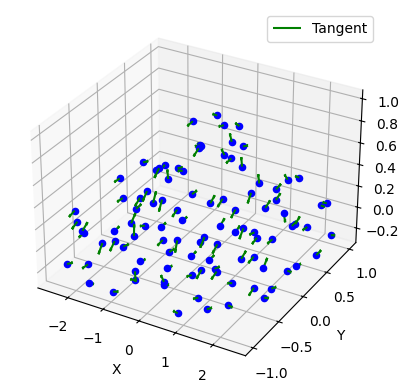

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

def compute_normal_vectors(points, k=10):
    """
    각 점에 대한 노말 벡터를 계산하는 함수.
    
    :param points: 점들의 좌표, (n, 3) 배열
    :param k: 각 점에 대해 고려할 최근접 이웃의 수
    :return: 각 점의 노말 벡터, (n, 3) 배열
    """
    nbrs = NearestNeighbors(n_neighbors=k+1, algorithm='auto').fit(points)
    _, indices = nbrs.kneighbors(points)
    
    normal_vectors = np.zeros(points.shape)
    
    # 각 점에 대해 노말 벡터 계산
    for i, neighbors in enumerate(indices):
        if len(neighbors) > 1:
            diffs = points[neighbors[1:]] - points[i]
            pca = PCA(n_components=3)
            pca.fit(diffs)
            normal = pca.components_[-1]
            normal_vectors[i] = normal

    return normal_vectors

def compute_tangent_and_binormal_vectors(points, normal_vectors):
    """
    각 점에 대한 탄젠트 벡터와 바이노멀 벡터를 계산하는 함수.
    
    :param points: 점들의 좌표, (n, 3) 배열
    :param normal_vectors: 각 점의 노말 벡터, (n, 3) 배열
    :return: 각 점의 탄젠트 벡터와 바이노멀 벡터, (n, 3) 배열
    """
    tangent_vectors = np.zeros(points.shape)
    binormal_vectors = np.zeros(points.shape)
    
    # 각 점에 대해 탄젠트 벡터 및 바이노멀 벡터 계산
    for i, normal in enumerate(normal_vectors):
        # 임의의 벡터 생성 (노말 벡터와 같은 방향이 아닐 확률이 높은 벡터)
        arbitrary_vector = np.array([1, 0, 0]) if normal[1] != 0 or normal[2] != 0 else np.array([0, 1, 0])
        tangent = np.cross(normal, arbitrary_vector)
        tangent /= np.linalg.norm(tangent)
        tangent_vectors[i] = tangent

        # 노말 벡터와 탄젠트 벡터의 외적으로 바이노멀 벡터 계산
        binormal = np.cross(normal, tangent)
        binormal /= np.linalg.norm(binormal)
        binormal_vectors[i] = binormal

    return tangent_vectors, binormal_vectors

def plot_vectors(points, normal_vectors, tangent_vectors, binormal_vectors, sample_rate=0.05):
    """
    각 점의 노말 벡터, 탄젠트 벡터, 바이노멀 벡터를 시각화하는 함수.
    
    :param points: 점들의 좌표, (n, 3) 배열
    :param normal_vectors: 각 점의 노말 벡터, (n, 3) 배열
    :param tangent_vectors: 각 점의 탄젠트 벡터, (n, 3) 배열
    :param binormal_vectors: 각 점의 바이노멀 벡터, (n, 3) 배열
    :param sample_rate: 시각화할 점들의 비율
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # 샘플링하여 시각화
    n_samples = int(len(points) * sample_rate)
    sample_indices = np.random.choice(len(points), n_samples, replace=False)
    
    for i in sample_indices:
        point = points[i]
        # normal = normal_vectors[i]
        tangent = tangent_vectors[i]
        # binormal = binormal_vectors[i]
        ax.scatter(*point, color='b')  # 점 표시
        # ax.quiver(*point, *normal, color='r', length=0.1, normalize=True, label='Normal' if i == sample_indices[0] else "")
        ax.quiver(*point, *tangent, color='g', length=0.1, normalize=True, label='Tangent' if i == sample_indices[0] else "")
        # ax.quiver(*point, *binormal, color='c', length=0.1, normalize=True, label='Binormal' if i == sample_indices[0] else "")

    # 그래프 설정
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.legend()
    plt.show()

# 예제 데이터 생성
# np.random.seed(0)
# points = np.random.rand(100, 3)  # 100개의 무작위 3D 점

# 노말 벡터 및 탄젠트 벡터, 바이노멀 벡터 계산
normal_vectors = compute_normal_vectors(points, k=10)
tangent_vectors, binormal_vectors = compute_tangent_and_binormal_vectors(points, normal_vectors)

# 벡터 시각화
plot_vectors(points, normal_vectors, tangent_vectors, binormal_vectors, sample_rate=1)

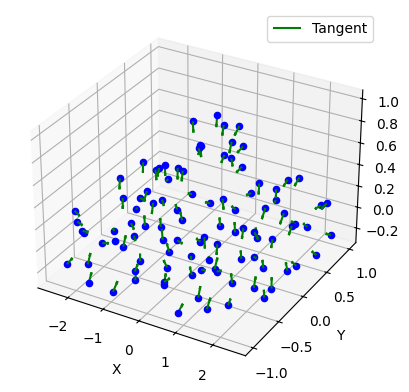

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def compute_tangent_vectors(points, k=10):
    """
    각 점에 대해 탄젠트 벡터를 계산하는 함수.
    
    :param points: 점들의 좌표, (n, 3) 배열
    :param k: 각 점에 대해 고려할 최근접 이웃의 수
    :return: 각 점의 탄젠트 벡터, (n, 3) 배열
    """
    nbrs = NearestNeighbors(n_neighbors=k+1, algorithm='auto').fit(points)
    _, indices = nbrs.kneighbors(points)
    
    tangent_vectors = np.zeros(points.shape)
    
    # 각 점에 대해 탄젠트 벡터 계산
    for i, neighbors in enumerate(indices):
        if len(neighbors) > 1:
            # 인접 점들과의 차분 벡터 계산
            diffs = points[neighbors[1:]] - points[i]
            # 평균 차분 벡터 계산
            mean_diff = np.mean(diffs, axis=0)
            # 정규화하여 탄젠트 벡터 계산
            tangent = mean_diff / np.linalg.norm(mean_diff)
            tangent_vectors[i] = tangent

    return tangent_vectors

def plot_tangent_vectors(points, tangent_vectors, sample_rate=0.1):
    """
    각 점의 탄젠트 벡터를 시각화하는 함수.
    
    :param points: 점들의 좌표, (n, 3) 배열
    :param tangent_vectors: 각 점의 탄젠트 벡터, (n, 3) 배열
    :param sample_rate: 시각화할 점들의 비율
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # 샘플링하여 시각화
    n_samples = int(len(points) * sample_rate)
    sample_indices = np.random.choice(len(points), n_samples, replace=False)
    
    for i in sample_indices:
        point = points[i]
        tangent = tangent_vectors[i]
        ax.scatter(*point, color='b')  # 점 표시
        ax.quiver(*point, *tangent, color='g', length=0.1, normalize=True, label='Tangent' if i == sample_indices[0] else "")

    # 그래프 설정
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.legend()
    plt.show()

# # 예제 데이터 생성
# np.random.seed(0)
# points = np.random.rand(100, 3)  # 100개의 무작위 3D 점

# 탄젠트 벡터 계산
tangent_vectors = compute_tangent_vectors(points, k=10)

# 탄젠트 벡터 시각화
plot_tangent_vectors(points, tangent_vectors, sample_rate=1)